_Einführung in Python, Clemens Brunner, 2.2.2017_

# 11 - Pandas

Pandas ist ein Python-Paket, welches Datenstrukturen und Methoden zum Einlesen, Manipulieren, Analysieren und Schreiben von Daten bietet. Die in Pandas enthaltene Datenstruktur `DataFrame` (inspiriert vom gleichnamigen Datentyp in R) speichert Daten in einer Tabelle und ermöglicht vielfältigte Manipulationen.

Wir beginnen wieder mit dem Import des Pakets:

In [1]:
import pandas as pd

Danach bereiten wir Python auf grafische Darstellungen vor:

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

Die Daten für das folgende Beispiel sind bereits in einer CSV-Datei abgespeichert. Eine CSV-Datei ist nichts anderes als eine reine Textdatei (d.h. sie enthält keinerlei Formatierungen wie z.B. eine Word-Datei), welche die Daten in einer Tabelle enthält. In den Zeilen befinden sich die einzelnen Beobachtungen, während die verschiedenen Spalten (welche meist die verschiedenen Variablen repräsentieren) durch Kommas (comma-separated values) oder andere Trennzeichen getrennt sind.

Im folgenden Beispiel aus dem [Pandas Cookbook](https://github.com/jvns/pandas-cookbook) werden wir Daten aus einer CSV-Datei einlesen, deren Werte durch Strichpunkte getrennt sind. Zur Veranschaulichung sind hier ein paar Zeilen aus der Textdatei dargestellt:

    20/01/2012;161;;4;96;217;67;1;1
    21/01/2012;53;;0;47;70;32;1;0
    22/01/2012;71;;0;41;73;35;5;0
    23/01/2012;210;;6;114;357;91;6;0
    24/01/2012;299;;1;189;444;174;4;0
    25/01/2012;334;;1;217;453;180;4;0
    26/01/2012;306;;0;215;495;191;0;1
    27/01/2012;91;;5;79;204;65;0;0

Dieser Datensatz beinhaltet Daten über die Anzahl an Radfahrern auf verschiedenen Radstrecken an unterschiedlichen Tagen. Man sieht schon in der Darstellung des Dateiinhaltes, dass es auch fehlende Werte gibt.

Pandas stellt die Funktion `read_csv` zur Verfügung. Im ersten Schritt rufen wir diese Funktion mit den Default-Argumenten auf, d.h. wir übergeben nur den Dateinamen:

In [3]:
df = pd.read_csv("bikes.csv")

Die Daten befinden sich nun in einem `DataFrame`-Objekt namens `df`. Ein `DataFrame` ist ein spezieller Datentyp, welcher sich sehr gut für tabellarische (zweidimensionale) Daten eignet. Man kann sich den Inhalt eines Data Frames also wie eine Excel-Tabelle vorstellen, mit Zeilen und Spalten. Wir können uns die ersten paar Zeilen unseres gerade erstellten Data Frames mit der `head`-Methode ausgeben lassen:

In [4]:
df.head()

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


Dieser erste Blick auf die Daten zeigt schon, dass beim Einlesen offensichtlich etwas schief gegangen ist. Alle Daten befinden sich offensichtlich in einer einzigen Spalte.

Grundlegende Informationen über die Struktur eines Data Frames bekommt man mit folgendem Befehl:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 1 columns):
Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)    310 non-null object
dtypes: object(1)
memory usage: 2.5+ KB


Hier erfährt man, dass das Objekt 310 Einträge (Zeilen) hat und nur 1 Spalte. Es sieht so aus, als ob Pandas die `;` nicht als Trennzeichen für Spalten erkannt hat. Dies kann man einfach mit einem leicht modifizierten Aufruf beheben:

In [6]:
df = pd.read_csv("bikes.csv", sep=";")
df.head()

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN


Das sieht auf jeden Fall schon einmal wesentlich besser aus. Pandas unterstützt außerdem Datumsangaben, d.h. man kann die Spalte `Date` gleich beim Einlesen in einen solchen Typ umwandeln. Außerdem kann das Datum dann gleich als Index für das Data Frame verwendet werden, weil ein Datum einen Eintrag eindeutig identifiziert.

In [7]:
df = pd.read_csv("bikes.csv", sep=";", parse_dates=["Date"], dayfirst=True, index_col="Date")
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


Nun befinden sich die Daten sauber in einem Data Frame. Ein kurzer Blick auf die Struktur bestätigt dies:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 9 columns):
Berri 1                                310 non-null int64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


Einzelne Spalten kann man anhand ihres Namens wie folgt herausholen:

In [9]:
df["Berri 1"]

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

Mehrere Spalten kann man herausholen, indem man in die eckigen Klammern einfach eine Liste mit den gewünschten Spaltennamen schreibt:

In [10]:
df[["Berri 1", "du Parc"]].head()

,Berri 1,du Parc
Date,,
2012-01-01,35,26
2012-01-02,83,53
2012-01-03,135,89
2012-01-04,144,111
2012-01-05,197,97


Es fällt aber auf, dass zwei Spalten keine Einträge haben. Daher können wir diese beiden Spalten aus dem Data Frame löschen:

In [11]:
df = df.drop(["Brébeuf (données non disponibles)", "St-Urbain (données non disponibles)"], axis=1)
df.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


Nun sind also nur mehr Spalten mit Daten vorhanden:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 7 columns):
Berri 1                  310 non-null int64
Côte-Sainte-Catherine    310 non-null int64
Maisonneuve 1            310 non-null int64
Maisonneuve 2            310 non-null int64
du Parc                  310 non-null int64
Pierre-Dupuy             310 non-null int64
Rachel1                  310 non-null int64
dtypes: int64(7)
memory usage: 19.4 KB


Mit Pandas kann man Daten auch sehr einfach grafisch darstellen, z.B. die eben herausgegriffene Spalte:

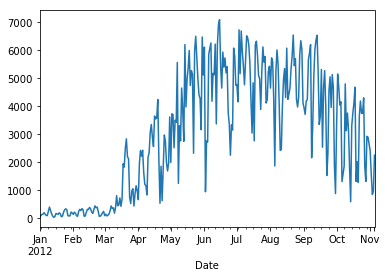

In [13]:
df["Berri 1"].plot()

Nicht ganz überraschend sieht man, dass die Anzahl der Radfahrer auf dieser Radstrecke in den Wintermonaten sehr viel geringer ist als in den Sommer- und Herbstmonaten.

Eine weitere Fragestellung könnte sein, ob sich mehr Leute unter der Woche oder an den Wochenenden auf den Fahrradstrecken befinden. Wenden wir uns im folgenden Beispiel dem Index zu.

In [14]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

Wie man schon an der Zeilenanzahl des Data Frames gesehen hat, fehlen offensichtlich einige Tage, da nur 310 von 365 Tagen vorhanden sind. Der Index für jede Zeile muss nicht eindeutig sein, ist es in diesem Beispiel aber. Die Datumsspalte könnte auch als ganz normale Spalte vorhanden sein, auch dann würden die nachfolgenden Dinge (angewendet auf eben die Spalte) funktionieren.

Der Typ der Index-Spalte beschreibt Zeitpunkte (Datum und Uhrzeit), das haben wir bei Einlesen so angegeben. Daher kann man nun mit speziellen Methoden den Wochentag eines Datums herausfinden:

In [15]:
df.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

Man kann diese Zuordnung jetzt als neue Spalte hinzufügen:

In [16]:
df["weekday"] = df.index.weekday

In [17]:
df.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,weekday
Date,,,,,,,,
2012-01-01,35,0,38,51,26,10,16,6
2012-01-02,83,1,68,153,53,6,43,0
2012-01-03,135,2,104,248,89,3,58,1
2012-01-04,144,1,116,318,111,8,61,2
2012-01-05,197,2,124,330,97,13,95,3


Data Frames kann man nun nach bestimmten Variablen gruppieren. In unserem Beispiel können wir also nach der Spalte `weekday` gruppieren und danach die Summe an Radfahrern pro Wochentag berechnen.

In [18]:
weekday_counts = df.groupby("weekday").aggregate(sum)
weekday_counts

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
weekday,,,,,,,
0,134298,60329,90051,163767,90184,46204,130130
1,135305,58708,92035,165880,91399,35167,120088
2,152972,67344,104891,186061,102103,43263,133088
3,160131,69028,111895,196715,105674,45385,140241
4,141771,56446,98568,172390,89872,42470,137255
5,101578,34018,62067,105060,48289,52861,112828
6,99310,36466,55324,98308,50004,61485,117150


Hier entsprechen die Zahlen von 0 bis 6 den Wochentagen von Montag bis Sonntag. Es sieht also so aus, als ob am Wochenende weniger Radfahrer unterwegs sind. Dies können wir auch grafisch darstellen:

In [19]:
weekday_counts.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

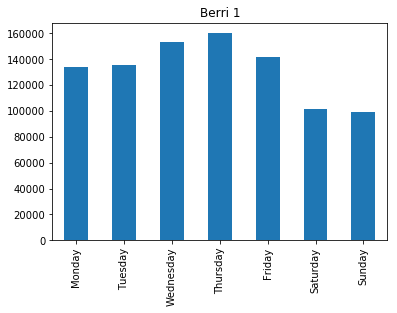

In [20]:
weekday_counts["Berri 1"].plot(kind="bar", title="Berri 1")

Diesen Trend sieht man auch, wenn man alle Radstrecken gleichzeitig darstellt:

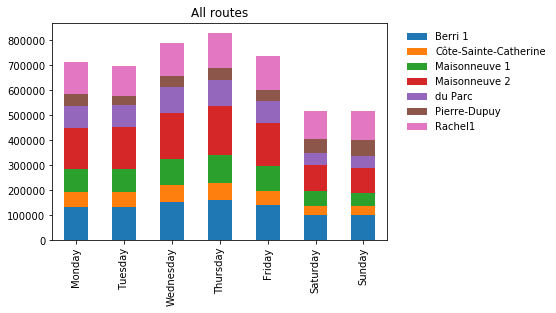

In [21]:
weekday_counts.plot(kind="bar",
                    stacked=True,
                    title="All routes").legend(loc="upper right",
                                               bbox_to_anchor=(1.5, 1),
                                               frameon=False)